In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import lightgbm as lgb

In [2]:
df_train = pd.read_csv(r'C:\Users\65836\Downloads\5153\train.csv', index_col=None)
df_test = pd.read_csv(r'C:\Users\65836\Downloads\5153\test.csv', index_col=None)

In [3]:
df_train.head()

,Unnamed: 0,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Movie_aveRating,TV_aveRating,GDP,Population,Gini_Index,Happiness_Share,Life_Satisfaction,Broadband_subscriptions,Cellular_subscriptions,averageRating,numVotes
0,1,AU,Australia,6114,4050,2064,7.84,12.12,16.39,6.868653,6.868653,1.327836e+12,25687041.0,34.3,93.989067,7.137,35.049375,107.663235,6.735294,51170.882353
1,2,AT,Austria,5640,3779,1861,9.03,14.67,20.32,6.758839,6.758839,4.332585e+11,8917205.0,30.2,88.242794,7.213,28.934986,118.607839,6.720000,56523.133333
2,4,BO,Bolivia,4991,3155,1836,7.99,10.99,13.99,6.776089,6.776089,3.657276e+10,10698896.0,43.6,55.744255,5.559,7.983520,101.125004,7.227273,73955.272727
3,6,BG,Bulgaria,6797,4819,1978,9.03,11.29,13.54,6.806522,6.806522,6.988935e+10,6934015.0,40.3,55.744255,5.598,30.677454,114.352765,6.700000,57580.928571
4,7,CA,Canada,6239,4311,1928,7.91,11.87,15.03,6.806172,6.806172,1.645423e+12,38005238.0,33.3,95.050880,7.025,41.801011,95.630528,6.785714,74551.785714


In [4]:
df_test

,Unnamed: 0,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Movie_aveRating,TV_aveRating,GDP,Population,Gini_Index,Happiness_Share,Life_Satisfaction,Broadband_subscriptions,Cellular_subscriptions,averageRating,numVotes
0,46,PT,Portugal,5047,3419,1628,9.03,13.54,18.06,6.822973,6.822973,2.285392e+11,10305564.0,32.8,87.207031,5.768,40.806254,116.262992,6.560000,53837.533333
1,27,ID,Indonesia,3887,2449,1438,8.36,10.66,12.96,6.838804,6.838804,1.058424e+12,273523621.0,37.0,92.942940,5.347,3.916703,130.061386,7.152941,56026.470588
2,3,BE,Belgium,4990,3374,1616,10.16,15.24,20.32,6.794554,6.794554,5.218613e+11,11555997.0,27.2,91.081085,6.839,40.848697,99.483201,7.146667,92616.133333
3,36,MX,Mexico,4993,3158,1835,6.62,10.43,14.24,6.720545,6.720545,1.073916e+12,128932753.0,45.4,94.250000,5.964,16.448040,93.445588,7.266667,66604.500000
4,53,KR,South Korea,5195,3334,1861,8.07,11.47,14.45,6.755185,6.755185,1.637896e+12,51780579.0,31.4,89.741447,5.793,43.554782,137.536175,7.000000,50869.533333
5,0,AR,Argentina,4760,3154,1606,3.74,6.30,9.26,6.752242,6.752242,3.892881e+11,45376763.0,42.3,87.207031,5.901,21.178002,121.170400,7.300000,73667.636364
6,41,NO,Norway,4528,2955,1573,9.94,12.17,17.75,6.764272,6.764272,3.621983e+11,5379475.0,27.7,96.386719,7.290,44.042702,107.458495,7.075000,62721.687500
7,64,VE,Venezuela,4797,3154,1643,7.99,10.99,13.99,6.763664,6.763664,4.726000e+10,28435943.0,44.8,86.333336,4.574,8.465298,63.400007,6.771429,58351.500000
8,20,GR,Greece,4772,3344,1428,9.03,12.42,15.80,6.756022,6.756022,1.888352e+11,10715549.0,33.1,88.242794,5.788,40.842406,109.497610,6.871429,68420.357143
9,5,BR,Brazil,4972,3162,1810,4.61,7.11,9.96,6.807072,6.807072,1.444733e+12,212559409.0,48.9,91.784515,6.110,17.098593,96.836350,6.858333,60636.083333


In [5]:
X_train = df_train.iloc[:, [3,4,5,9,10,11,12,13,14,15,16,17]]
y1_train = df_train.iloc[:, 6]
y2_train = df_train.iloc[:, 7]
y3_train = df_train.iloc[:, 8]

In [6]:
X_train

,Total Library Size,No. of TV Shows,No. of Movies,Movie_aveRating,TV_aveRating,GDP,Population,Gini_Index,Happiness_Share,Life_Satisfaction,Broadband_subscriptions,Cellular_subscriptions
0,6114,4050,2064,6.868653,6.868653,1.327836e+12,2.568704e+07,34.30,93.989067,7.137,35.049375,107.663235
1,5640,3779,1861,6.758839,6.758839,4.332585e+11,8.917205e+06,30.20,88.242794,7.213,28.934986,118.607839
2,4991,3155,1836,6.776089,6.776089,3.657276e+10,1.069890e+07,43.60,55.744255,5.559,7.983520,101.125004
3,6797,4819,1978,6.806522,6.806522,6.988935e+10,6.934015e+06,40.30,55.744255,5.598,30.677454,114.352765
4,6239,4311,1928,6.806172,6.806172,1.645423e+12,3.800524e+07,33.30,95.050880,7.025,41.801011,95.630528
5,4994,3156,1838,6.846409,6.846409,2.529400e+11,1.911621e+07,44.90,84.669342,6.151,19.623287,131.136145
6,4991,3156,1835,6.797384,6.797384,2.714376e+11,5.088288e+07,54.20,91.594971,5.709,15.260084,132.996708
7,4988,3152,1836,6.735131,6.735131,6.184690e+10,5.094114e+06,49.30,88.242794,6.998,19.487672,147.471456
8,2274,1675,599,6.850083,6.850083,5.720378e+10,4.047200e+06,28.90,69.397995,6.508,25.113421,106.587440
9,7325,5234,2091,6.803730,6.803730,2.453393e+11,1.161451e+07,25.30,83.524231,6.897,35.508925,121.387394


In [7]:
y1_train

0      7.84
1      9.03
2      7.99
3      9.03
4      7.91
5      7.07
6      4.31
7      8.99
8      9.03
9      8.83
10    12.00
11     7.99
12    10.16
13     9.03
14     9.03
15     7.99
16     7.99
17     8.08
18     7.64
19     9.03
20     2.64
21     9.03
22    10.56
23     9.03
24     8.73
25     9.03
26    12.88
27     9.03
28     8.29
29     9.03
30     9.03
31     9.03
32     8.80
33     8.29
34     6.11
35     7.13
36     9.03
37     8.13
38     9.03
39     9.51
40     9.03
41     6.26
42     9.03
43    10.90
44    12.88
45     9.74
46     8.34
47     1.97
48     5.64
49     7.91
50     8.99
51     8.99
Name: Cost Per Month - Basic ($), dtype: float64

In [8]:
y2_train

0     12.12
1     14.67
2     10.99
3     11.29
4     11.87
5      9.91
6      6.86
7     12.99
8     11.29
9     11.49
10    15.04
11    10.99
12    15.24
13    14.67
14    14.67
15    10.99
16    10.99
17    10.00
18    10.71
19    14.67
20     6.61
21    14.67
22    15.05
23    14.67
24    13.13
25    11.29
26    20.46
27    11.29
28    10.65
29    11.29
30    13.54
31    13.54
32    12.53
33    11.49
34     8.56
35    10.58
36    11.29
37    10.84
38    14.67
39    12.81
40    11.29
41    10.05
42    14.67
43    14.20
44    20.46
45    11.90
46    10.43
47     3.00
48     8.46
49    13.20
50    13.99
51    12.99
Name: Cost Per Month - Standard ($), dtype: float64

In [9]:
y3_train

0     16.39
1     20.32
2     13.99
3     13.54
4     15.03
5     12.74
6      9.93
7     15.99
8     13.54
9     14.15
10    19.60
11    13.99
12    20.32
13    20.32
14    20.32
15    13.99
16    13.99
17    11.93
18    13.78
19    20.32
20     8.60
21    20.32
22    19.54
23    20.32
24    17.45
25    13.54
26    26.96
27    13.54
28    13.02
29    13.54
30    18.06
31    18.06
32    16.94
33    14.69
34    11.01
35    14.76
36    13.54
37    13.56
38    20.32
39    16.11
40    13.54
41    12.58
42    20.32
43    19.70
44    26.96
45    14.07
46    12.52
47     4.02
48    11.29
49    18.48
50    17.99
51    15.99
Name: Cost Per Month - Premium ($), dtype: float64

In [10]:
X_test = df_test.iloc[:, [3,4,5,9,10,11,12,13,14,15,16,17]]
y1_test = df_test.iloc[:, 6]
y2_test = df_test.iloc[:, 7]
y3_test = df_test.iloc[:, 8]

In [11]:
y1_test

0      9.03
1      8.36
2     10.16
3      6.62
4      8.07
5      3.74
6      9.94
7      7.99
8      9.03
9      4.61
10     9.03
11     7.35
12     9.03
Name: Cost Per Month - Basic ($), dtype: float64

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [12]:
from lightgbm import LGBMRegressor

# Creating an object for model and fitting it on training data set
model1 = LGBMRegressor()
model1.fit(X_train, y1_train)
 
# Predicting the Target variable
pred1 = model1.predict(X_test)
print(pred1)
accuracy1 = model1.score(X_test, y1_test)
print(accuracy1)

[ 9.59949559  6.62636571 10.41797971  6.28279015  8.51900157  6.54209777
 10.50793922  6.28279015  9.59949559  6.28279015 10.85151477  5.80590011
  9.76944816]
0.4591269770355799


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

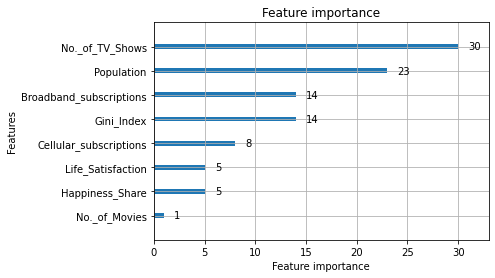

In [13]:
lgb.plot_importance(model1, max_num_features=10)

In [14]:
y2_test

0     13.54
1     10.66
2     15.24
3     10.43
4     11.47
5      6.30
6     12.17
7     10.99
8     12.42
9      7.11
10    13.54
11     9.14
12    11.29
Name: Cost Per Month - Standard ($), dtype: float64

In [15]:
# Creating an object for model and fitting it on training data set
model2 = LGBMRegressor()
model2.fit(X_train, y2_train)
 
# Predicting the Target variable
pred2 = model2.predict(X_test)
print(pred2)
accuracy2 = model2.score(X_test, y2_test)
print(accuracy2)

[13.01651281  9.90322487 14.21155102  9.76809395 12.34080307  9.9480799
 15.04549952  9.76809395 12.55645912  9.63998124 15.30874315  9.23972365
 13.66266684]
0.4526677941897195


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

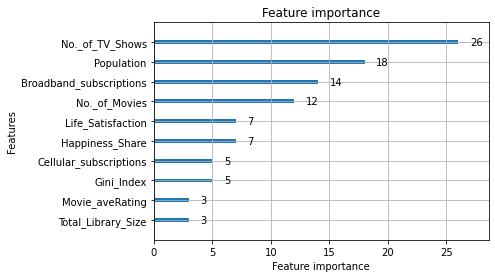

In [16]:
lgb.plot_importance(model2, max_num_features=10)

In [17]:
y3_test

0     18.06
1     12.96
2     20.32
3     14.24
4     14.45
5      9.26
6     17.75
7     13.99
8     15.80
9      9.96
10    18.06
11    10.93
12    13.54
Name: Cost Per Month - Premium ($), dtype: float64

In [18]:
# Creating an object for model and fitting it on training data set
model3 = LGBMRegressor()
model3.fit(X_train, y3_train)
 
# Predicting the Target variable
pred3 = model3.predict(X_test)
print(pred3)
accuracy3 = model2.score(X_test, y3_test)
print(accuracy3)

[17.00497286 13.15489627 19.12472735 13.1342469  16.93149446 13.09375743
 19.93418685 12.94766686 16.63122378 13.0088057  20.08027741 12.15182533
 17.26176726]
-0.05416908631140771


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

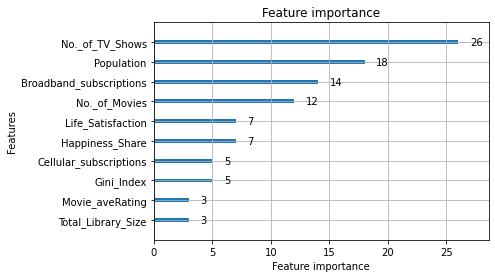

In [19]:
lgb.plot_importance(model2, max_num_features=10)

In [20]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))
    return mape

In [21]:
MAPE1= MAPE(y1_test, pred1)
print("MAPE1: ",MAPE1)
MAPE2= MAPE(y2_test, pred2)
print("MAPE2: ",MAPE2)
MAPE3= MAPE(y3_test, pred3)
print("MAPE3: ",MAPE3)

MAPE1:  0.1801579021111555
MAPE2:  0.1508892678107385
MAPE3:  0.14234368406811185


In [51]:
param_grid ={'n_estimators': [10, 50, 100, 200],
             'num_leaves': [5, 10, 20, 30], 
             'max_depth': [1, 5, 10, 20],
             'min_child_samples': [5, 10, 20], 
             'reg_alpha': [1, 50, 100],
             'reg_lambda': [1, 50, 100]}

In [52]:
from sklearn.model_selection import GridSearchCV

lgbmc=LGBMRegressor(random_state=0)
CV_lgbmc = GridSearchCV(estimator=lgbmc, param_grid=param_grid, cv= 5)
CV_lgbmc.fit(X_train, y2_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=0),
             param_grid={'max_depth': [1, 5, 10, 20],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [10, 50, 100, 200],
                         'num_leaves': [5, 10, 20, 30],
                         'reg_alpha': [1, 50, 100],
                         'reg_lambda': [1, 50, 100]})

In [53]:
CV_lgbmc.best_params_

{'max_depth': 5,
 'min_child_samples': 5,
 'n_estimators': 200,
 'num_leaves': 5,
 'reg_alpha': 1,
 'reg_lambda': 100}

In [54]:
model2_final = LGBMRegressor(random_state=0, max_depth=5,
 min_child_samples=5,
 n_estimators=200,
 num_leaves=5,
 reg_alpha=1,
 reg_lambda=100)

In [55]:
model2_final.fit(X_train, y2_train)
 
# Predicting the Target variable
pred2_final = model2_final.predict(X_test)
print(pred2_final)
accuracy2_final = model2_final.score(X_test, y2_test)
print(accuracy2_final)

[12.38879277  9.5470852  14.02241171  9.66924481 12.62674008  9.75496641
 15.18917346  9.73483541 12.23163056  9.17453569 15.07405741  9.59050786
 12.35980521]
0.5157791001301227


In [56]:
from sklearn.metrics import mean_squared_error

def MAE(Y_actual,Y_Predicted):
    mae = np.mean(np.abs(Y_actual - Y_Predicted))
    return mae

def RMSE(Y_actual,Y_Predicted):
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    mse = mean_squared_error(Y_actual, Y_Predicted)
    rmse = sqrt(mse)
    return rmse

In [57]:
from sklearn.metrics import mean_squared_error

MAE2= MAE(y2_test, pred2)
print("MAE2: ",MAE2)

MAPE2= MAPE(y2_test, pred2)
print("MAPE2: ",MAPE2)

RMSE2= RMSE(y2_test, pred2)
print("RMSE2: ",RMSE2)

MAE2_final= MAE(y2_test, pred2_final)
print("MAE2_final: ",MAE2_final)

MAPE2_final= MAPE(y2_test, pred2_final)
print("MAPE2_final: ",MAPE2_final)

RMSE2_final= RMSE(y2_test, pred2_final)
print("RMSE2_final: ",RMSE2_final)

MAE2:  1.422652299212173
MAPE2:  0.1508892678107385
RMSE2:  1.783649724161638
MAE2_final:  1.4181373599045666
MAPE2_final:  0.14743759204893808
RMSE2_final:  1.6776672803267747


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

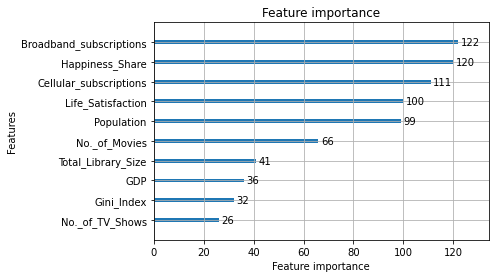

In [58]:
lgb.plot_importance(model2_final, max_num_features=10)